# Question 21:-generate synthetic data with 4 centers using make blobs and apply K-means clistering visualize using a scatter plot.

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data with 4 centers
n_samples = 300
n_features = 2
n_centers = 4
random_state = 42

X, y = make_blobs(n_samples=n_samples, centers=n_centers, n_features=n_features, random_state=random_state)

print("Shape of generated data (X):"),
print(X.shape)
print("Shape of true labels (y):"),
print(y.shape)


Shape of generated data (X):
(300, 2)
Shape of true labels (y):
(300,)


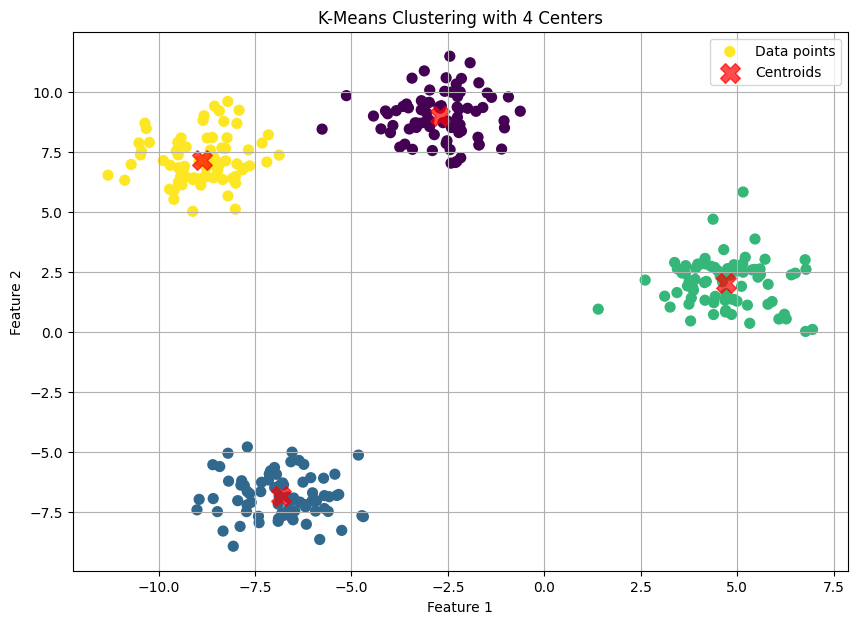

In [ ]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_centers, random_state=random_state, n_init=10)
kmeans.fit(X)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the data and clusters
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', label='Data points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.7, marker='X', label='Centroids')
plt.title(f'K-Means Clustering with {n_centers} Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


Question22:- Load the wine dataset and apply K-means clistering after standaedizing the features. Print the size of each cluster.

In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target # True labels (for reference, not used in unsupervised K-Means)

print("Shape of wine dataset (X):")
print(X.shape)

Shape of wine dataset (X):
(178, 13)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape of scaled wine dataset (X_scaled):")
print(X_scaled.shape)

Shape of scaled wine dataset (X_scaled):
(178, 13)


In [ ]:
# Determine the optimal number of clusters (often the number of true classes in supervised contexts)
# For the wine dataset, there are 3 true classes.
n_clusters = 3 # Based on the known classes in the wine dataset

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

# Print the size of each cluster
cluster_sizes = pd.Series(cluster_labels).value_counts().sort_index()
print("Size of each cluster:")
print(cluster_sizes)

Size of each cluster:
0    65
1    51
2    62
Name: count, dtype: int64


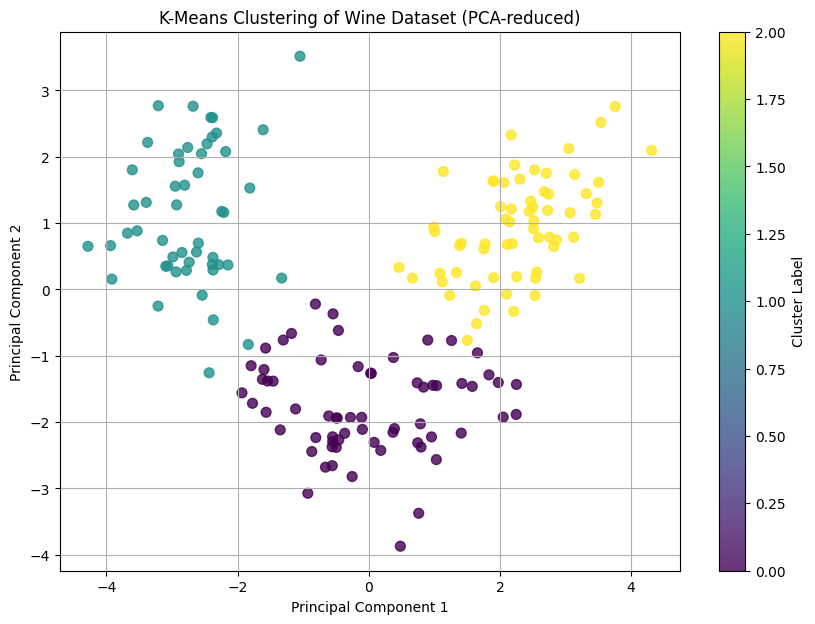

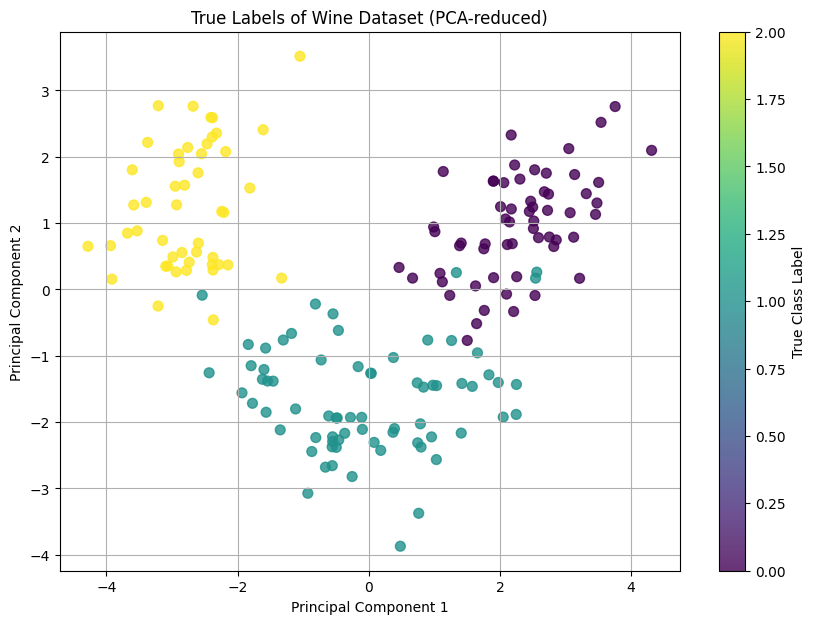

In [ ]:
import matplotlib.pyplot as plt

# For visualization, we'll reduce dimensionality to 2D using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.8)
plt.title('K-Means Clustering of Wine Dataset (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

# You can also compare with true labels if interested (for evaluation, not part of unsupervised clustering)
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50, alpha=0.8)
plt.title('True Labels of Wine Dataset (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='True Class Label')
plt.grid(True)
plt.show()

Question26:- Load the breast cancer dataset,apply MinMaxScaler, and use K-means with 2 clusters. Output the cluster centroids.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd

# Load the breast cancer dataset
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target # True labels (for reference, not used in unsupervised K-Means)

print("Shape of breast cancer dataset (X_cancer):")
print(X_cancer.shape)

Shape of breast cancer dataset (X_cancer):
(569, 30)


In [ ]:
# Apply MinMaxScaler
scaler_cancer = MinMaxScaler()
X_cancer_scaled = scaler_cancer.fit_transform(X_cancer)

print("Shape of scaled breast cancer dataset (X_cancer_scaled):")
print(X_cancer_scaled.shape)

Shape of scaled breast cancer dataset (X_cancer_scaled):
(569, 30)


In [ ]:
# Apply K-Means clustering with 2 clusters
n_clusters_cancer = 2
kmeans_cancer = KMeans(n_clusters=n_clusters_cancer, random_state=42, n_init=10)
kmeans_cancer.fit(X_cancer_scaled)

# Get cluster centroids
centroids_cancer = kmeans_cancer.cluster_centers_

print(f"Cluster centroids for {n_clusters_cancer} clusters:")
print(pd.DataFrame(centroids_cancer, columns=cancer.feature_names))

Cluster centroids for 2 clusters:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.504836      0.395603        0.505787   0.363766         0.469887   
1     0.255354      0.288335        0.246964   0.143884         0.357431   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.422263        0.418387              0.46928       0.458997   
1          0.180195        0.103448              0.13066       0.340118   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.299459  ...      0.480474       0.451074         0.465530   
1                0.255916  ...      0.205241       0.320690         0.192421   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.314606          0.498688           0.363915         0.390273   
1    0.099434          0.357112           0.148739         0.131423   

   worst concave points  worst symmetry  worst fractal d

Question28:-Load the Digits dataset, reduce  it to 2D using PCA,and visualize clisters from K means.

In [ ]:
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()
digits_data = digits.data
digits_target = digits.target

print("Shape of digits_data:")
print(digits_data.shape)
print("Shape of digits_target:")
print(digits_target.shape)

Shape of digits_data:
(1797, 64)
Shape of digits_target:
(1797,)


In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA with 2 components and a random state for reproducibility
pca = PCA(n_components=2, random_state=42)

# Apply PCA to the digits data
digits_pca = pca.fit_transform(digits_data)

print("Shape of PCA-reduced digits_data (digits_pca):")
print(digits_pca.shape)

Shape of PCA-reduced digits_data (digits_pca):
(1797, 2)


In [ ]:
from sklearn.cluster import KMeans

# Initialize KMeans with 10 clusters and a random state for reproducibility
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)

# Fit KMeans to the PCA-reduced digits data
kmeans.fit(digits_pca)

# Get the cluster labels
kmeans_labels = kmeans.labels_

print("Shape of KMeans cluster labels:")
print(kmeans_labels.shape)
print("First 10 cluster labels:")
print(kmeans_labels[:10])

Shape of KMeans cluster labels:
(1797,)
First 10 cluster labels:
[6 1 8 5 2 3 2 7 0 3]


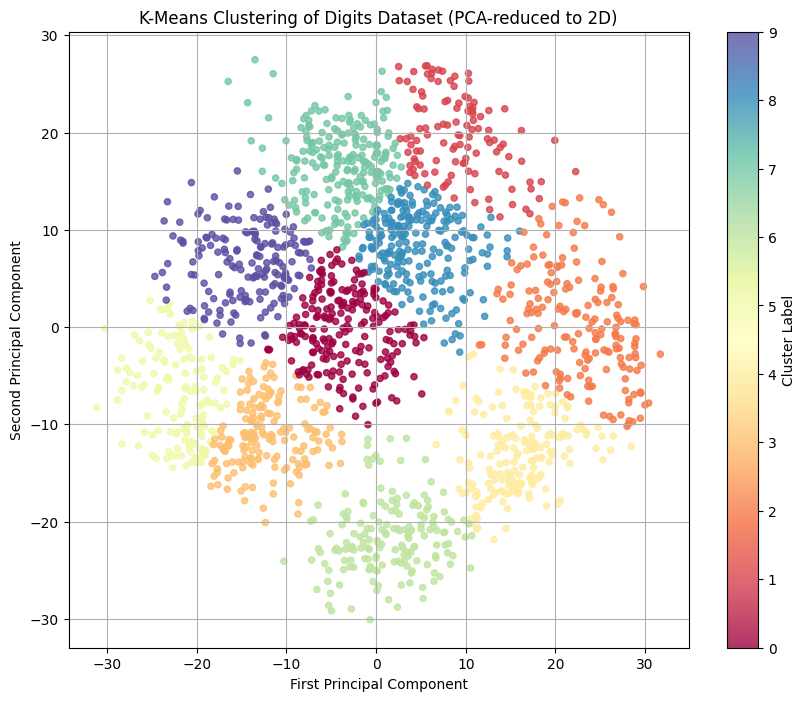

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(digits_pca[:, 0], digits_pca[:, 1], c=kmeans_labels, cmap='Spectral', s=20, alpha=0.8)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clustering of Digits Dataset (PCA-reduced to 2D)')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


Question29:- Creat synthetic data using make blobs and evaluate silhouette scores for K=2 to 5.

In [ ]:
from sklearn.datasets import make_blobs

# Generate synthetic data with 4 centers
n_samples = 500
n_features = 2
n_centers = 4
random_state = 42

X_synthetic, y_synthetic = make_blobs(n_samples=n_samples, centers=n_centers, n_features=n_features, random_state=random_state)

print("Shape of generated synthetic data (X_synthetic):")
print(X_synthetic.shape)
print("Shape of true labels (y_synthetic):")
print(y_synthetic.shape)

Shape of generated synthetic data (X_synthetic):
(500, 2)
Shape of true labels (y_synthetic):
(500,)


## Evaluate Silhouette Score


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Create an empty list called silhouette_scores to store the silhouette score for each K value.
silhouette_scores = []
# 2. Create an empty list called k_values to store the K values (from 2 to 5).
k_values = []

# 3. Loop through K values from 2 to 5 (inclusive).
for k in range(2, 6):
    # 4a. Initialize a KMeans model with n_clusters=K and random_state=42, and set n_init='auto'.
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')

    # 4b. Fit the KMeans model to the X_synthetic data.
    kmeans.fit(X_synthetic)

    # 4c. Predict the cluster labels for X_synthetic using the fitted KMeans model.
    # The labels are directly available after fitting
    cluster_labels = kmeans.labels_

    # 4d. Calculate the silhouette score using X_synthetic and the predicted cluster labels.
    score = silhouette_score(X_synthetic, cluster_labels)

    # 4e. Append the current K value to the k_values list.
    k_values.append(k)
    # 4f. Append the calculated silhouette score to the silhouette_scores list.
    silhouette_scores.append(score)

# 5. Print the k_values and silhouette_scores lists to inspect the results.
print("K values tested:", k_values)
print("Silhouette scores for each K:", silhouette_scores)

K values tested: [2, 3, 4, 5]
Silhouette scores for each K: [np.float64(0.5955207405315346), np.float64(0.7613478432173022), np.float64(0.7911042588289479), np.float64(0.6884073865467201)]


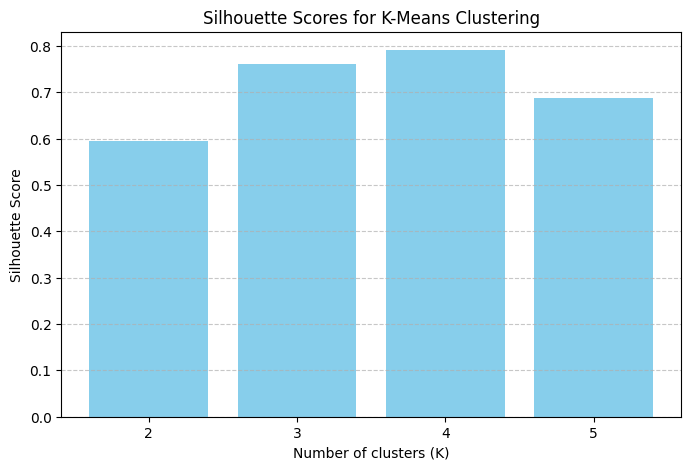

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and an axes object for the plot
plt.figure(figsize=(8, 5))

# Plot the k_values on the x-axis and silhouette_scores on the y-axis as a bar chart
plt.bar(k_values, silhouette_scores, color='skyblue')

# Label the x-axis
plt.xlabel('Number of clusters (K)')

# Label the y-axis
plt.ylabel('Silhouette Score')

# Add a title to the plot
plt.title('Silhouette Scores for K-Means Clustering')

# Add a grid to the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set x-axis ticks to be exactly the k_values
plt.xticks(k_values)

# Display the plot
plt.show()

Question30:-Load the iris dataset and use hierarchical clistering to group data.plot a dendrogram with average linkage.

In [ ]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

print("Shape of Iris features (X_iris):")
print(X_iris.shape)
print("Shape of Iris target (y_iris):")
print(y_iris.shape)

Shape of Iris features (X_iris):
(150, 4)
Shape of Iris target (y_iris):
(150,)


## Perform Hierarchical Clustering


In [ ]:
from scipy.cluster.hierarchy import linkage

# Compute the linkage matrix using 'average' linkage
linked_iris = linkage(X_iris, method='average')

print("Shape of linkage matrix (linked_iris):")
print(linked_iris.shape)

Shape of linkage matrix (linked_iris):
(149, 4)


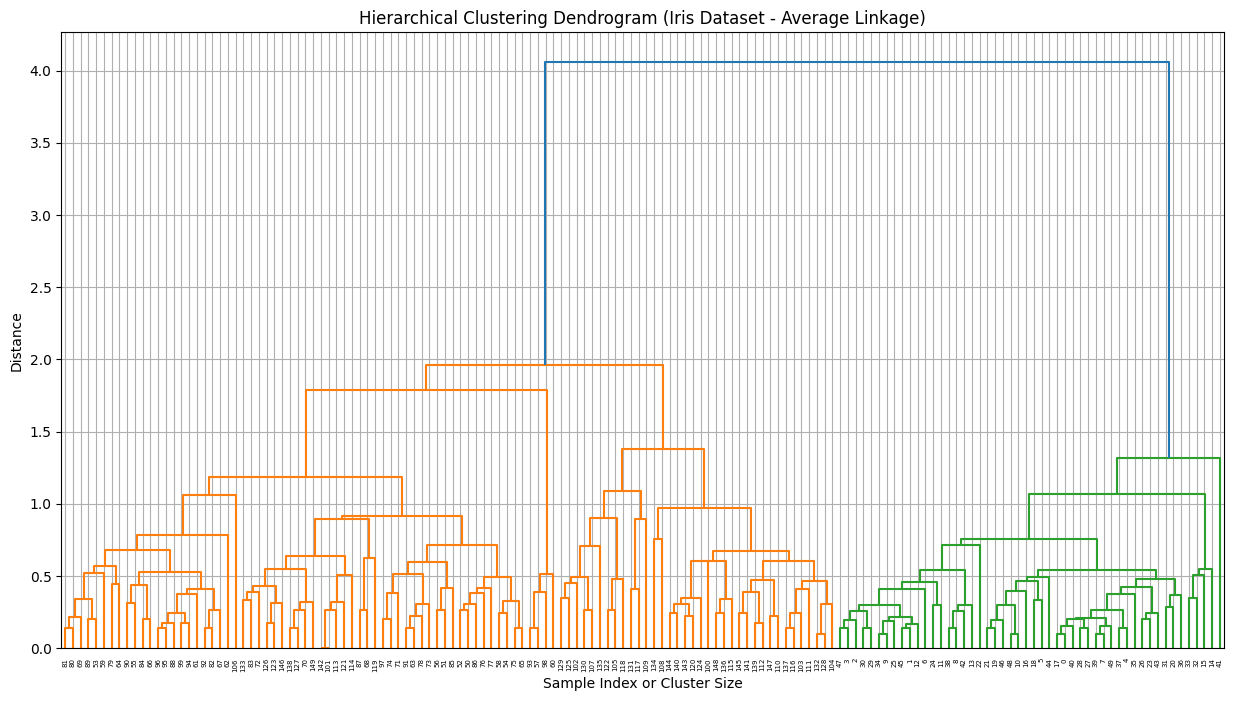

In [ ]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linked_iris,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Iris Dataset - Average Linkage)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

Question34:- load the Breast cancer dataset and compare inertia values for K=2 to 6 using K-means . show results in a line plot.

Question34:- load the Breast cancer dataset and compare inertia values for K=2 to 6 using K-means . show results in a line plot.

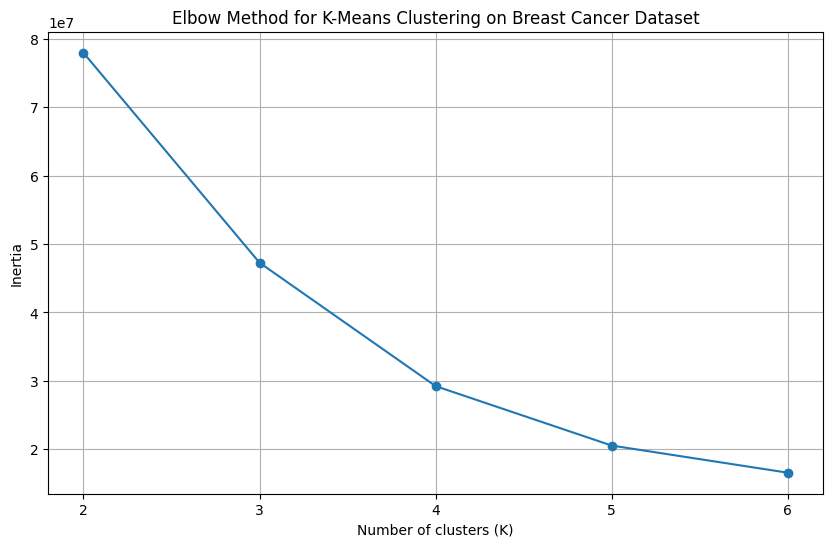

Inertia values for K from 2 to 6:
K=2: 77943099.88
K=3: 47264841.92
K=4: 29226541.65
K=5: 20539877.62
K=6: 16573867.02


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# List to store inertia values and K values
inertia_values = []
k_range = range(2, 7) # K from 2 to 6

for k in k_range:
    # Initialize KMeans with current K and a random state for reproducibility
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # Fit KMeans to the breast cancer data
    kmeans.fit(X_cancer)

    # Append the inertia (sum of squared distances of samples to their closest cluster center)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='-')
plt.title('Elbow Method for K-Means Clustering on Breast Cancer Dataset')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

print("Inertia values for K from 2 to 6:")
for k, inertia in zip(k_range, inertia_values):
    print(f"K={k}: {inertia:.2f}")

In [ ]:
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

print("Shape of breast cancer dataset (X_cancer):")
print(X_cancer.shape)
print("Shape of target (y_cancer):")
print(y_cancer.shape)

Shape of breast cancer dataset (X_cancer):
(569, 30)
Shape of target (y_cancer):
(569,)


Question35:- Generate synthetic concentric circle using make_circle and cluster using Afflomerative clustering with single linkage

In [ ]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Generate synthetic concentric circle data
X_circles, y_circles = make_circles(n_samples=200, factor=0.5, noise=0.05, random_state=42)

print("Shape of generated circles data (X_circles):")
print(X_circles.shape)
print("First 5 rows of X_circles:")
print(X_circles[:5])


Shape of generated circles data (X_circles):
(200, 2)
First 5 rows of X_circles:
[[ 0.92232106 -0.33009191]
 [ 0.6047763   0.80864799]
 [-0.27065215  0.89356689]
 [-0.47692015 -0.20221979]
 [-0.13378205  0.56034441]]


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering with single linkage
# The 'make_circles' function typically generates 2 clusters, so we'll set n_clusters=2
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='single')
cluster_labels_circles = agg_clustering.fit_predict(X_circles)

print("Shape of cluster labels:")
print(cluster_labels_circles.shape)
print("First 10 cluster labels:")
print(cluster_labels_circles[:10])


Shape of cluster labels:
(200,)
First 10 cluster labels:
[0 0 0 1 1 1 0 1 1 0]


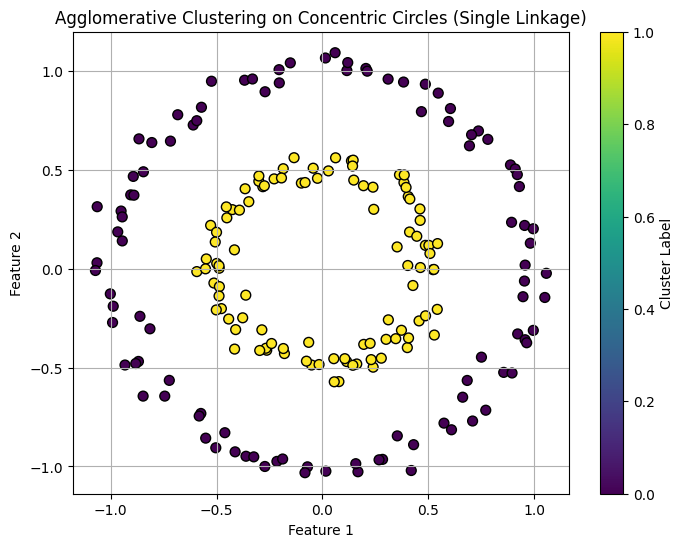

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=cluster_labels_circles, cmap='viridis', s=50, edgecolors='k')
plt.title('Agglomerative Clustering on Concentric Circles (Single Linkage)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


Question38:- Load the iris dataset ,cluster with DBSCAN , and print how many samples werw identifird as noise.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import numpy as np

# Load the Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target # True labels (for reference, not used in unsupervised DBSCAN)

print("Shape of Iris features (X_iris):")
print(X_iris.shape)

Shape of Iris features (X_iris):
(150, 4)


In [ ]:
# Apply DBSCAN clustering
# These parameters (eps, min_samples) often require tuning for optimal results.
# For Iris, common values are used here, but they might need adjustment.
dbsc = DBSCAN(eps=0.5, min_samples=5)
cluster_labels_dbscan = dbsc.fit_predict(X_iris)

# Get the number of noise samples (assigned label -1)
noise_samples = np.sum(cluster_labels_dbscan == -1)

print(f"Number of samples identified as noise: {noise_samples}")
print(f"Unique cluster labels (including noise -1): {np.unique(cluster_labels_dbscan)}")

Number of samples identified as noise: 17
Unique cluster labels (including noise -1): [-1  0  1]


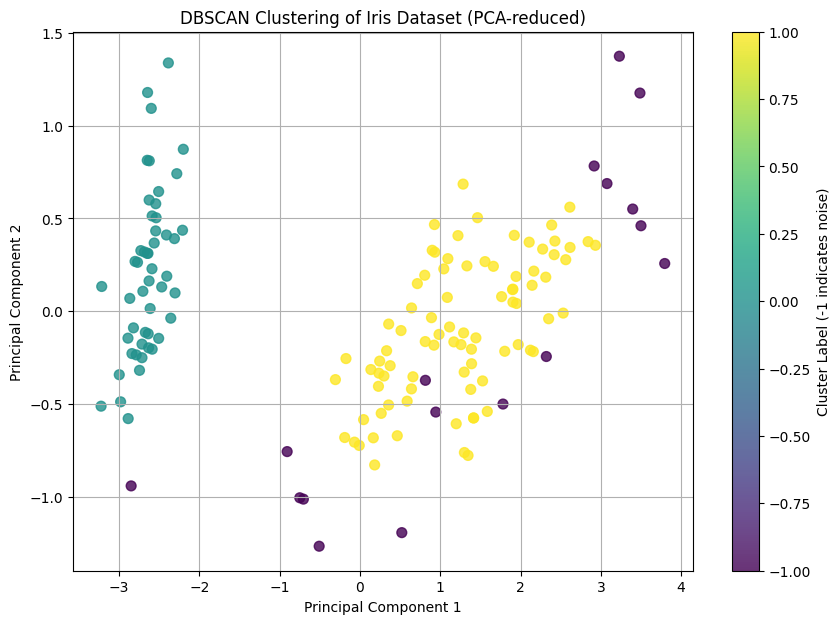

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensionality to 2D for visualization using PCA
pca = PCA(n_components=2, random_state=42)
X_iris_pca = pca.fit_transform(X_iris)

plt.figure(figsize=(10, 7))
# Plot data points, coloring by cluster labels
# Noise points (-1) will typically be colored differently
plt.scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], c=cluster_labels_dbscan, cmap='viridis', s=50, alpha=0.8)
plt.title('DBSCAN Clustering of Iris Dataset (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label (-1 indicates noise)')
plt.grid(True)
plt.show()

Question39:- Generate synthetic non-linearly separable data using make_moons, apply K-means, and visualize the clistering result.

In [ ]:
from sklearn.datasets import make_moons

# Generate synthetic non-linearly separable data using make_moons
X_moons, y_moons = make_moons(n_samples=200, noise=0.05, random_state=42)

print("Shape of generated features (X_moons):")
print(X_moons.shape)
print("Shape of true labels (y_moons):")
print(y_moons.shape)

Shape of generated features (X_moons):
(200, 2)
Shape of true labels (y_moons):
(200,)


In [ ]:
from sklearn.cluster import KMeans

# Initialize a KMeans model with 2 clusters
kmeans_moons = KMeans(n_clusters=2, random_state=42, n_init=10)

# Fit the KMeans model to the X_moons data
kmeans_moons.fit(X_moons)

# Get the cluster labels
kmeans_labels_moons = kmeans_moons.labels_

print("Shape of KMeans cluster labels for moons data:")
print(kmeans_labels_moons.shape)
print("First 10 cluster labels:")
print(kmeans_labels_moons[:10])

Shape of KMeans cluster labels for moons data:
(200,)
First 10 cluster labels:
[0 1 0 1 1 0 0 1 1 0]


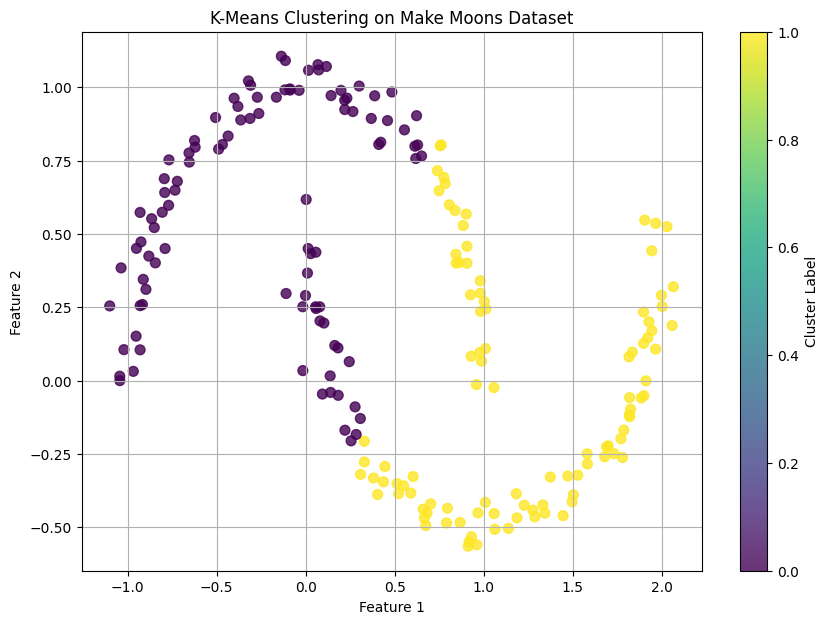

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=kmeans_labels_moons, cmap='viridis', s=50, alpha=0.8)
plt.title('K-Means Clustering on Make Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()